In [11]:
!pip install psycopg2

In [9]:
# library dependencies
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [59]:
from password import password
user = "postgres"
host = "localhost"
port = "5432" 
db = "Employees_db"
uri = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}"


In [6]:
engine = create_engine(uri)
connection = engine.connect()

In [7]:
connection

In [36]:
#Create a histogram to visualize the most common salary ranges for employees.
# Step 1: query data
sql_salary_hist = '''
select s.salary
  from salaries s;
'''

In [43]:
# Step 2: Make the dataframe
hist_df = pd.read_sql(sql_salary_hist, engine)
hist_df.salary.describe()

count    300024.000000
mean      52970.732451
std       14301.478491
min       40000.000000
25%       40000.000000
50%       48681.000000
75%       61758.000000
max      129492.000000
Name: salary, dtype: float64

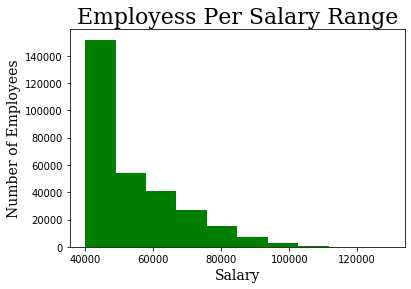

In [58]:
# Step 3: Plot the data
plt.hist(hist_df.salary, color = 'green')
plt.ylabel("Number of Employees", fontsize=14, fontfamily='serif')
plt.xlabel("Salary", fontsize=14, fontfamily='serif')
plt.title("Employess Per Salary Range", fontsize=22, fontfamily='serif')
plt.savefig('../Images/sal_hist.png')
plt.show()

In [30]:
# Create a bar chart of average salary by title.
# Step 1: query data
sql_avg_salary = '''
select t.title as "Title", round(avg(s.salary),2) as "Average Salary"
  from employees e
  left join salaries s
    on s.emp_no = e.emp_no
  left join titles t
    on t.title_id = e.emp_title_id
 group by t.title
 order by "Average Salary" Desc
;
    '''


In [31]:
# Step 2: Make the dataframe
salary_df = pd.read_sql(sql_avg_salary, engine)
salary_df

,Title,Average Salary
0,Senior Staff,58550.17
1,Staff,58465.38
2,Manager,51531.04
3,Technique Leader,48582.90
4,Assistant Engineer,48564.43
5,Engineer,48535.34
6,Senior Engineer,48506.80


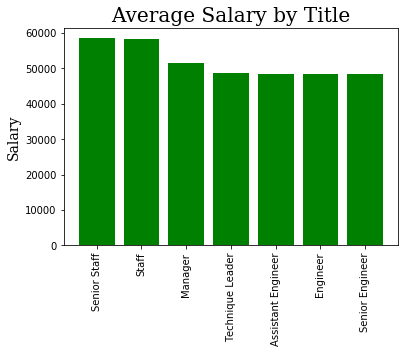

In [56]:
# Step 3: Plot the data
plt.bar(salary_df.Title, salary_df["Average Salary"], color = 'green')
plt.xticks(rotation=90)
#plt.xlabel("Title", fontsize=14, fontfamily='serif')
plt.ylabel("Salary", fontsize=14, fontfamily='serif')
plt.title("Average Salary by Title", fontsize=20, fontfamily='serif')
plt.savefig('../Images/avg_salary.png')
plt.show()